In [1]:
# https://kaggle-kr.tistory.com/17?category=868316

In [2]:
# 왜도 첨도
# for col in numerical_feats: 
#     print('{:15}'.format(col), 'Skewness: {:05.2f}'.format(df_train[col].skew()) , 
#     ' ' , 
#     'Kurtosis: {:06.2f}'.format(df_train[col].kurt()) 
#     )



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import missingno as msno  # 결측치 시각화

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


### dataset 확인

In [4]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_train.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Gustafsson, Mr. Anders Vilhelm",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [7]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
df_test.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Ford, Mr. Arthur",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


결측치 확인

In [9]:
# train
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [10]:
# test
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


target 확인

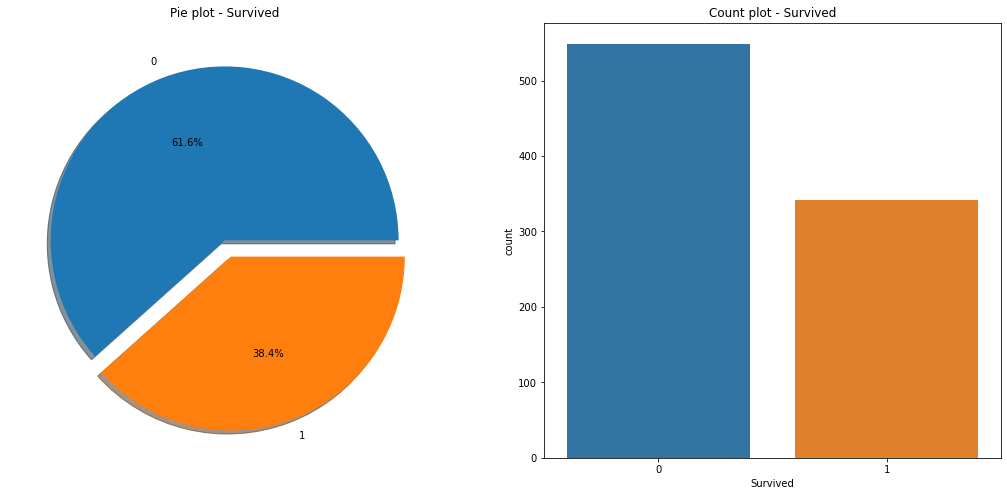

In [11]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

In [12]:
# target label 분포가 균일한 축. 

### EDA

In [13]:
# Pclass

pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')
# 행, 열 요인별 빈도 세어서 교차표 생성
# row, col, margins(행/열 합 추가)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [14]:
a = df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()
a

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<AxesSubplot:xlabel='Pclass'>

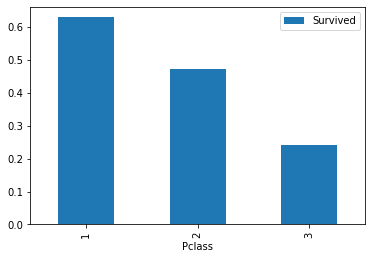

In [15]:
a.sort_values(by='Survived', ascending=False).plot.bar()

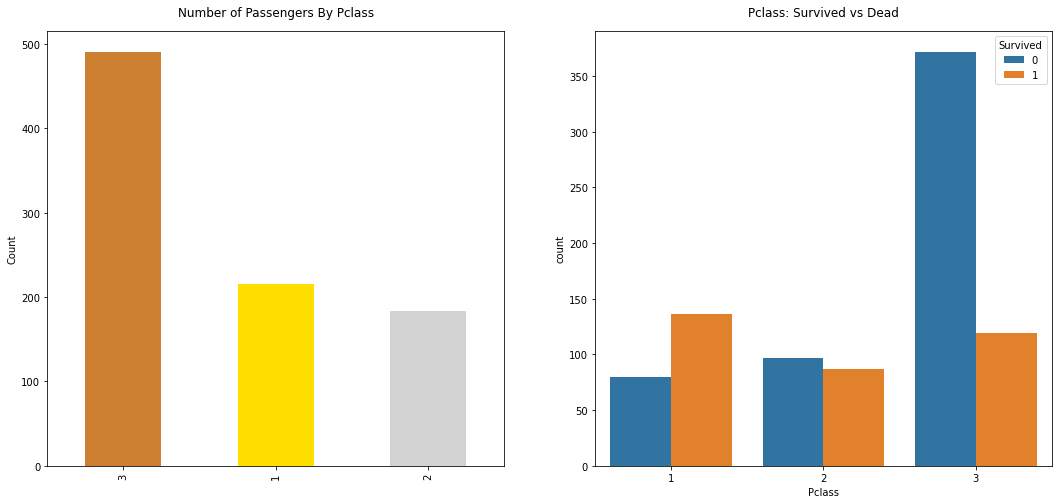

In [16]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

In [17]:
# 클래스가 높을 수록 생존확률이 높아진다. > class 고려. 
# 탑승자는 3class가 가장 많은데, 사망률이 가장 높고, 1class의 생존율이 가장 높다. 

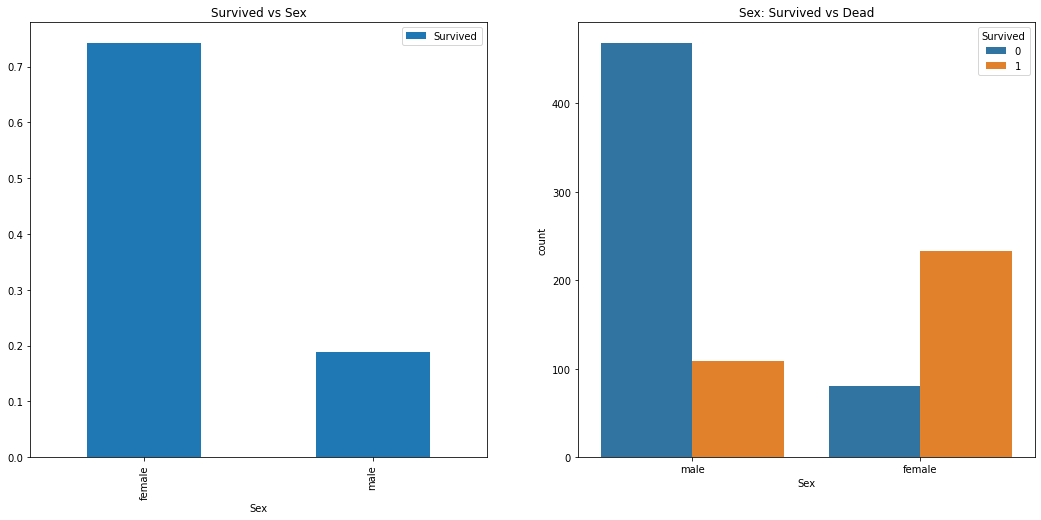

In [18]:
# Sex

f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [19]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [20]:
# 여성의 생존율이 가장 높다.(74.2%) > sex 고려

In [21]:
# sex & pclass

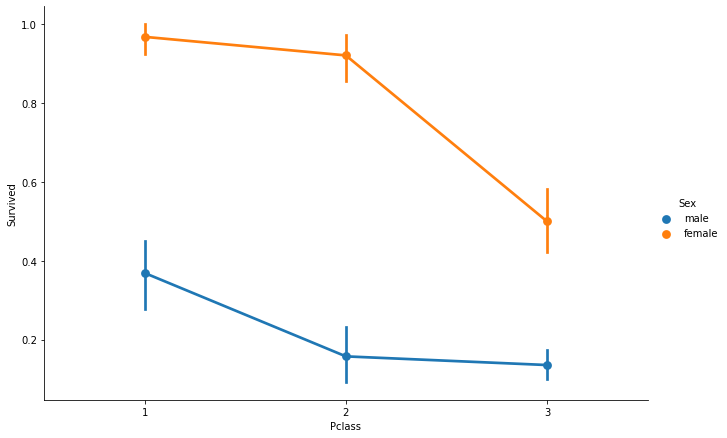

In [22]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, 
               size=6, aspect=1.5)

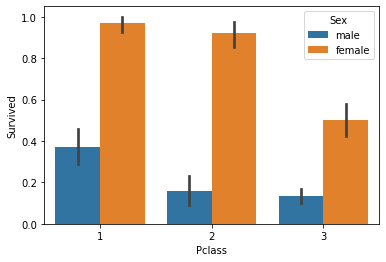

In [23]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df_train)
plt.show()

In [24]:
# 모든 class에서 여성의 생존율이 남성보다 높다.
# class가 낮아질수록 남녀 모두 생존률이 낮아진다. 

In [25]:
# Age

print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


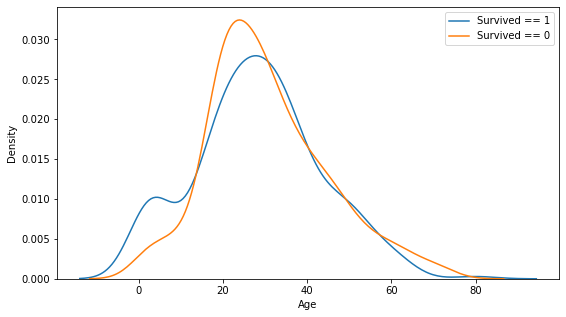

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

In [27]:
# 생존 그래프의 왜도가 더 크다(양의 방향) : 어린 아이들의 생존율이 높다. (생존자 중 나이가 어린 경우가 많다.)
# 사망 그래프의 첨도가 더 크다 : 20/30대의 사망률이 높다.

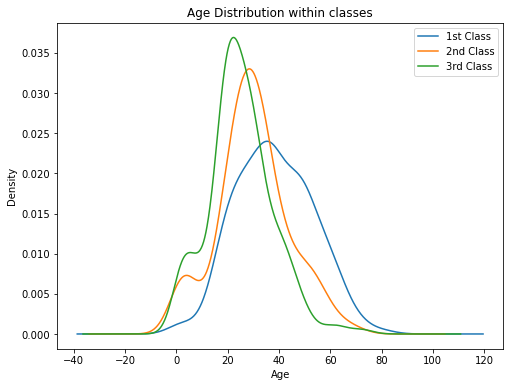

In [28]:
# Age distribution withing classes
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

In [29]:
# class가 낮을수록 왜도가 높다. : 낮은 class일 수록 나이가 어린 탑승객들이 많았다. 
# class가 낮을수록 첨도가 높다. : 낮은 class일수록 젊은 탑승객들이 많았다. = class가 높을수록 나이많은 사람의 비중이 커짐

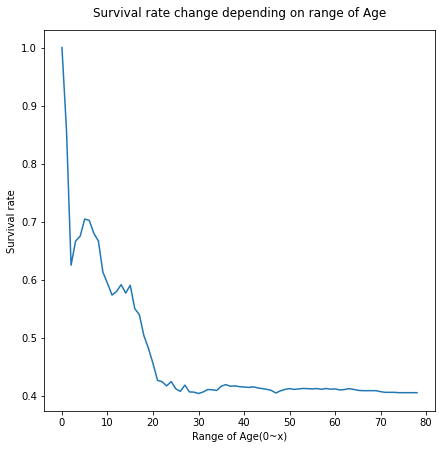

In [30]:
# 나이대 변화에 따른 생존율
# 나이범위를 넓히며 생존률 변화 보기

cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))   # avg 아닌가? 이게 어떻게 확률이 되는거지
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

In [31]:
# 나이가 늘어나지만, 계속해서 생존율이 떨어짐
# 나이가 어릴 수록 생존률이 확실히 높음         >>> age

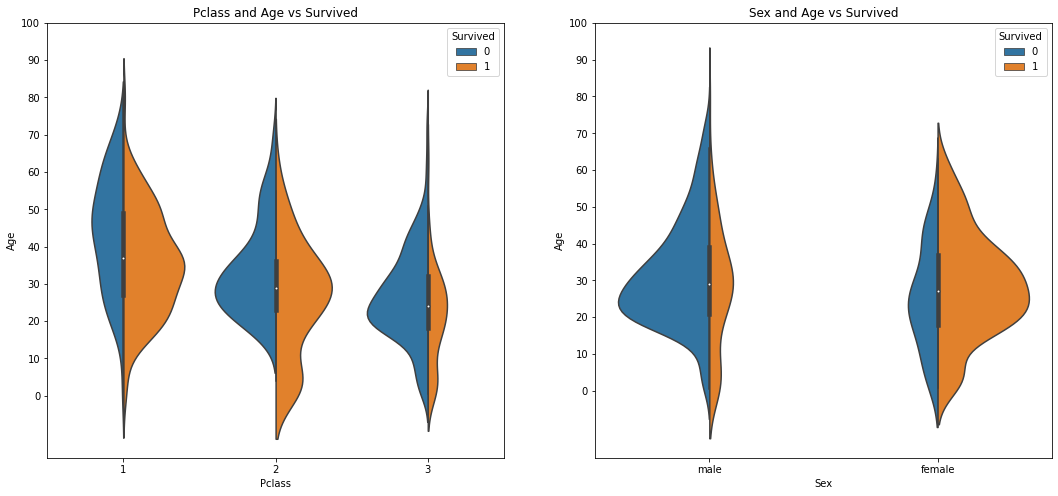

In [32]:
# pclass & sex & age 

f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [33]:
# 모든 class에서 나이가 어릴 수록 많이 생존함 (*2)
# 여성이 많이 생존했음. 
# 여성과 아이! 

<AxesSubplot:xlabel='Embarked'>

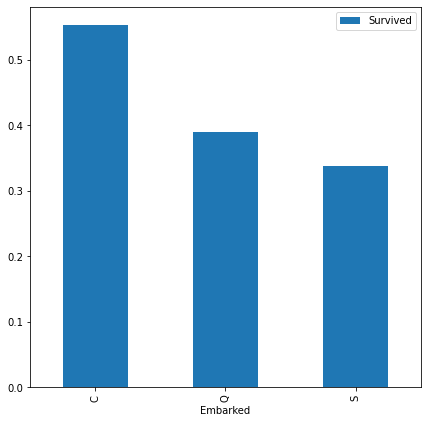

In [34]:
# Embarked 

f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

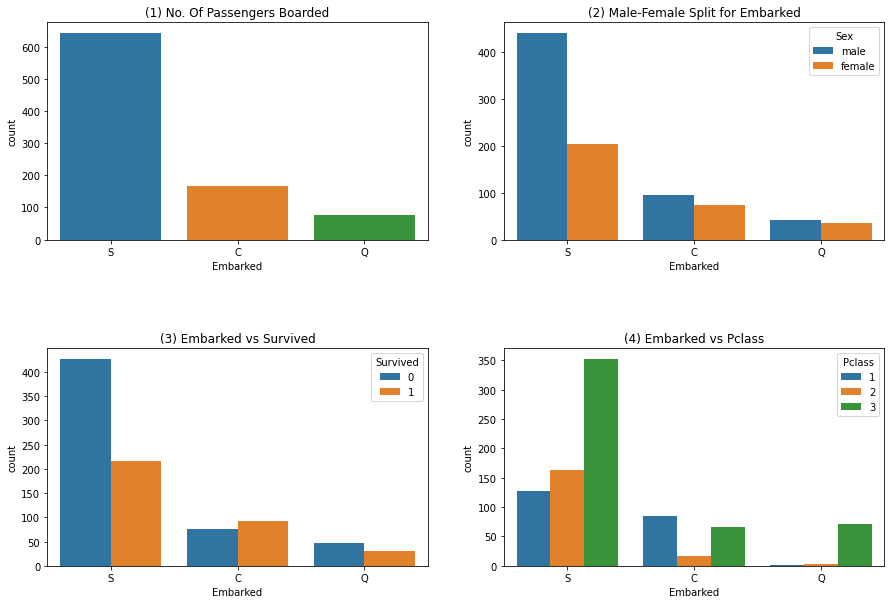

In [35]:
f,ax=plt.subplots(2, 2, figsize=(15,10))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [36]:
# C - Q - S 순으로 생존율이 높음 (성별 무관)

# S에서 가장 많이 탑승 
# C, Q 남녀비율 비슷, S는 남성이 2배 이상 많다.
# S 경우 생존률이 매우 낮다. 
# (pclass로 split) S 생존률 낮은 이유 : 3class / C 생존률 높은 이유 : 1 class

In [37]:
# Sibsp + Parch > family

df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1  # 본인 포함
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1     # ..

print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


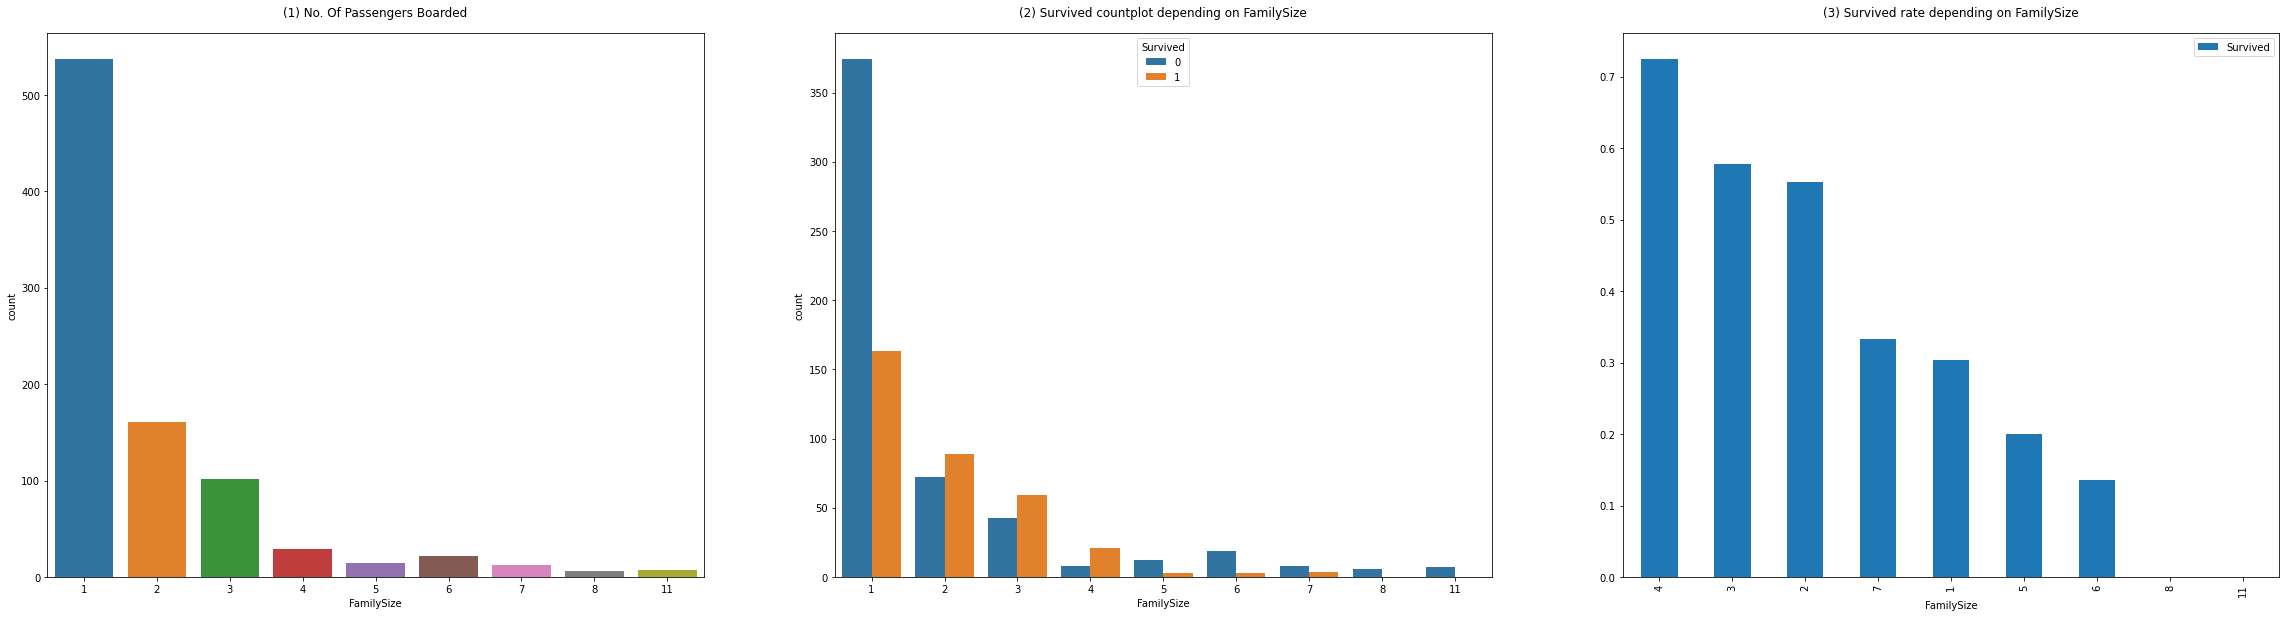

In [38]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [39]:
# 대부분이 혼자 탑승
# 혼자 탑승 경우 사망률이 높다 / 동행 시 생존율이 높다.(1~3)
# (해당범위 안에서) 동행가족이 늘어날 수록 생존률이 높다. (4>3>2>1)
# or 동행가족이 1~4일 때 생존률이 높다.
# 가족이 4명일 때 생존률이 가장 높다.


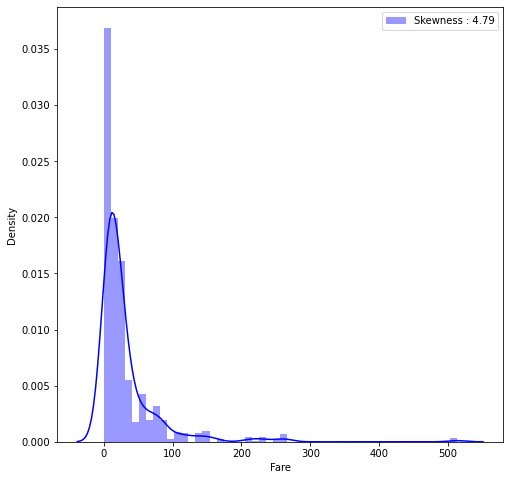

In [40]:
# fare 

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

# same
# f, ax = plt.subplots(figsize = (10, 6)) 
# sns.distplot(df_train["Fare"])


In [41]:
df_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [42]:
# fare 는 불균등한 데이터인가요? > Yes! > Log ( 데이터 분포 정규화)

# 큰 값 -> 같 비율의 작 값 / 첨도.왜도 down / 정규성이 높아짐
# https://hong-yp-ml-records.tistory.com/28

In [43]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() # testset 에 있는 nan value 를 평균값으로 치환합니다.>> ??

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)    # 음수 방지
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0) 

# https://hong-yp-ml-records.tistory.com/28

In [44]:
# Cabin > drop 
# Ticket > 생각! 

df_train['Ticket'].value_counts()


CA. 2343             7
347082               7
1601                 7
3101295              6
347088               6
                    ..
7546                 1
F.C. 12750           1
STON/O 2. 3101280    1
S.C./A.4. 23567      1
383121               1
Name: Ticket, Length: 681, dtype: int64

In [45]:
df_train['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

### Feature engineering

- 결측치 제거

In [46]:
# Age 

# name > initial
df_train['Initial']= df_train.Name.str.extract('([A-Za-z]+)\.') 
df_test['Initial']= df_test.Name.str.extract('([A-Za-z]+)\.') 
# initial & sex 
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r') 

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [47]:
pd.crosstab(df_test['Initial'], df_test['Sex']).T.style.background_gradient(cmap='summer_r') 

Initial,Col,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
Sex,,,,,,,,,
female,0,1,0,0,78,0,72,1,0
male,2,0,1,21,0,240,0,0,2


In [51]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_train.groupby('Initial')['Survived'].mean()

Initial
Master    0.575000
Miss      0.704301
Mr        0.162571
Mrs       0.795276
Other     0.111111
Name: Survived, dtype: float64

In [52]:
# 여성과 관계있는 Miss, Mr, Mrs 가 생존률이 높

<AxesSubplot:xlabel='Initial'>

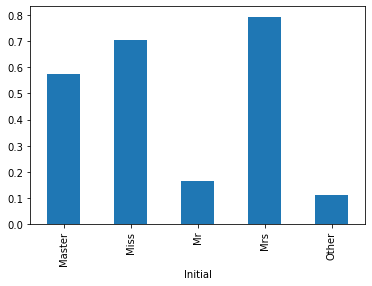

In [53]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()